# 프로젝트

### 주요 내용

1. 예제 데이터 불러오기
2. 결측값 처리, 형식 변환, 파생 변수 생성 등 전처리
3. 데이터 집계 및 시각화

<br>

### 목표 
1. 학습한 내용을 바탕으로 직접 데이터를 처리하고 분석할 수 있다.
2. 비즈니스 데이터를 활용한 문제 해결 절차를 경험한다.



<br>


## 프로젝트 수행 가이드

+ ipynb 파일이름을 `프로젝트_본인이름`으로 변경
+ 아래의 문제를 해결하기 위한 Python 코드를 작성
+ 별도로 안내된 방법에 따라 결과물 제출


<br>
<hr>
<br>

## 0. 라이브러리, 데이터 불러오기

프로젝트 수행을 위해 라이브러리와 2개 예제 데이터를 불러옵니다. 



In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 0.1. 생산 데이터 

2021년 한 해 동안 `A`, `B`, `C` 세 개 공장에서 각 라인별로 생산한 생산량과 불량품 개수를 정리한 데이터입니다.

**변수 설명**
+ date: 날짜
+ factory: 공장 구분
+ line: 라인 구분
+ capacity: 설계 생산량 
+ production: 실제 생산량
+ defective: 실제 생산량 중 불량품 개수

In [72]:
# 생산 데이터 불러오기
df_prod = pd.read_csv('production.csv')
df_prod

,date,factory,line,capacity,production,defective
0,2021-01-04,A,1,1000.0,979,3
1,2021-01-04,A,2,1000.0,948,3
2,2021-01-04,A,3,1000.0,962,4
3,2021-01-04,B,4,1500.0,1473,3
4,2021-01-04,B,5,1500.0,1462,5
...,...,...,...,...,...,...
2236,2021-12-31,B,5,1500.0,1457,6
2237,2021-12-31,C,6,2000.0,1987,8
2238,2021-12-31,C,7,2000.0,2025,8
2239,2021-12-31,C,8,2000.0,2034,7


### 0.2. 날씨 데이터
2021년 날씨 데이터입니다.

**변수 설명**
+ date: 날짜
+ temp_high: 최고 기온
+ temp_low: 최저 기온
+ hum: 상대습도
+ rain: 강수량

In [73]:
df_weather = pd.read_csv('weather.csv')
df_weather

,date,temp_high,temp_low,hum,rain
0,2021-01-01,1.6,-9.8,64.0,NaN
1,2021-01-02,-1.4,-8.4,38.5,NaN
2,2021-01-03,-2.0,-9.1,45.0,NaN
3,2021-01-04,0.3,-8.4,51.4,0.0
4,2021-01-05,-2.1,-9.9,52.8,0.0
...,...,...,...,...,...
360,2021-12-27,-3.9,-12.9,60.9,0.0
361,2021-12-28,-0.9,-8.5,73.8,NaN
362,2021-12-29,5.9,-3.8,72.9,0.2
363,2021-12-30,0.2,-6.8,48.5,0.0


<br>
<hr>
<br>

## 1. 프로젝트 수행

아래의 10개 문제를 해결하기 위한 명령어를 작성


### 01. 결측값 처리

1. df_prod에서 결측값이 존재하는 변수를 확인
2. 해당 결측값을 `line`별로 결측이 아닌 직전 정상값으로 대체(`groupby()`와 `fillna(method='ffill)` 활용)

> 2.에서 전체 데이터를 활용할 경우 `line`이 제거되므로, 해당 변수만 선택해서 결측값 대체


In [74]:
df_prod.isnull().any(axis=0)

date          False
factory       False
line          False
capacity       True
production    False
defective     False
dtype: bool

In [75]:
df_prod[df_prod.isnull().any(axis=1)]

,date,factory,line,capacity,production,defective
1836,2021-11-01,A,1,NaN,1010,3
1837,2021-11-01,A,2,NaN,984,4
1838,2021-11-01,A,3,NaN,993,3
1839,2021-11-01,B,4,NaN,1510,5
1840,2021-11-01,B,5,NaN,1521,2
...,...,...,...,...,...,...
2029,2021-11-30,B,5,NaN,1475,5
2030,2021-11-30,C,6,NaN,2073,2
2031,2021-11-30,C,7,NaN,1992,5
2032,2021-11-30,C,8,NaN,1959,9


In [76]:
df_prod['capacity'] = df_prod.groupby('line')['capacity'].fillna(method='ffill')
df_prod

,date,factory,line,capacity,production,defective
0,2021-01-04,A,1,1000.0,979,3
1,2021-01-04,A,2,1000.0,948,3
2,2021-01-04,A,3,1000.0,962,4
3,2021-01-04,B,4,1500.0,1473,3
4,2021-01-04,B,5,1500.0,1462,5
...,...,...,...,...,...,...
2236,2021-12-31,B,5,1500.0,1457,6
2237,2021-12-31,C,6,2000.0,1987,8
2238,2021-12-31,C,7,2000.0,2025,8
2239,2021-12-31,C,8,2000.0,2034,7


### 02. 변수 추가 및 관측치 부분 선택, 시각화

1. df_prod에서 변수 `production`와 `defective`를 활용하여 불량률(`defective`/`production`) 변수 `rate` 생성
2. df_prod에서 `rate`기준 상위 20개 관측치(행) 선택
3. df_prod에서 `rate`가 0.005 이상인 관측치(행) 선택
4. `rate`의 히스토그램 생성


In [77]:
df_prod['rate'] = df_prod['defective']/df_prod['production']
df_prod

,date,factory,line,capacity,production,defective,rate
0,2021-01-04,A,1,1000.0,979,3,0.003064
1,2021-01-04,A,2,1000.0,948,3,0.003165
2,2021-01-04,A,3,1000.0,962,4,0.004158
3,2021-01-04,B,4,1500.0,1473,3,0.002037
4,2021-01-04,B,5,1500.0,1462,5,0.003420
...,...,...,...,...,...,...,...
2236,2021-12-31,B,5,1500.0,1457,6,0.004118
2237,2021-12-31,C,6,2000.0,1987,8,0.004026
2238,2021-12-31,C,7,2000.0,2025,8,0.003951
2239,2021-12-31,C,8,2000.0,2034,7,0.003441


In [78]:
df_prod.nlargest(20,'rate')

,date,factory,line,capacity,production,defective,rate
1387,2021-08-13,A,2,1000.0,974,10,0.010267
1227,2021-07-20,B,4,1500.0,1489,15,0.010074
1389,2021-08-13,B,4,1500.0,1498,15,0.010013
1195,2021-07-14,C,8,2000.0,2003,20,0.009985
1174,2021-07-12,B,5,1500.0,1512,15,0.009921
1372,2021-08-11,B,5,1500.0,1513,15,0.009914
1375,2021-08-11,C,8,2000.0,2032,20,0.009843
1225,2021-07-20,A,2,1000.0,1023,10,0.009775
1392,2021-08-13,C,7,2000.0,2047,20,0.009770
1229,2021-07-20,C,6,2000.0,2059,20,0.009713


In [79]:
df_prod[df_prod['rate']>0.005]

,date,factory,line,capacity,production,defective,rate
135,2021-01-25,A,1,1000.0,990,5,0.005051
198,2021-02-03,A,1,1000.0,977,5,0.005118
225,2021-02-08,A,1,1000.0,997,5,0.005015
280,2021-02-18,A,2,1000.0,998,5,0.005010
281,2021-02-18,A,3,1000.0,977,5,0.005118
...,...,...,...,...,...,...,...
1899,2021-11-10,A,1,1000.0,972,5,0.005144
1909,2021-11-11,A,2,1000.0,996,5,0.005020
2026,2021-11-30,A,2,1000.0,974,5,0.005133
2188,2021-12-24,A,2,1000.0,984,5,0.005081


<AxesSubplot:xlabel='rate', ylabel='Count'>

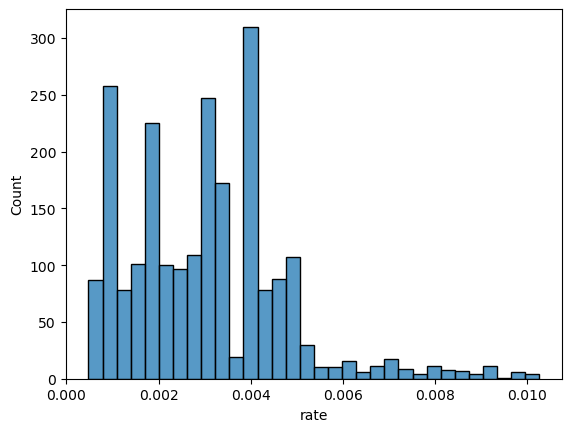

In [80]:
sns.histplot(data=df_prod, x='rate')

### 03. 집계값 계산
1. df_prod에서 `line`별 `rate`의 평균 계산
2. df_prod에서 `line`별 `production`의 합계를 계산(Series 형식으로 계산)
3. df_prod에서 `line`별 `defective`의 합계를 계산(Series 형식으로 계산)
4. 3.를 2.로 나눠 불량률 계산(1.의 `rate` 평균과 다른 것을 확인)

>전체 생산량 중 전체 불량 건의 비율이 실제 불량률이고, `rate`의 평균과 다름


In [81]:
df_prod.groupby('line')['rate'].mean()


line
1    0.003045
2    0.003085
3    0.003065
4    0.002900
5    0.003092
6    0.003077
7    0.003060
8    0.003073
9    0.002913
Name: rate, dtype: float64

In [82]:
df_prod.groupby('line')['production'].sum()
df_prod.groupby('line')['defective'].sum()
df_prod.groupby('line')['defective'].sum()/df_prod.groupby('line')['production'].sum()

line
1    0.003039
2    0.003082
3    0.003062
4    0.002897
5    0.003091
6    0.003075
7    0.003059
8    0.003074
9    0.002913
dtype: float64

In [106]:
df_prod.groupby('line')['rate'].mean()-df_prod.groupby('line')['defective'].sum()/df_prod.groupby('line')['production'].sum()

line
1    5.820093e-06
2    2.589599e-06
3    3.017136e-06
4    3.285861e-06
5    9.329426e-07
6    1.829476e-06
7    1.322750e-06
8   -6.633527e-07
9    3.640653e-07
dtype: float64

### 04. 변수 형식 변환 및 날짜 파생 변수 생성, 활용
1. df_prod에서 `date`를 날짜시간 형식으로 변환
2. df_prod에서 `date`를 활용하여 월을 의미하는 `month`변수 생성
3. df_prod에서 `month`와 `factory`를 그룹변수로 활용하여 두 변수 조합별  `production`합계를 피벗테이블로 계산


In [83]:
df_prod['date'] = pd.to_datetime(df_prod['date'])

In [84]:
df_prod['month'] = df_prod['date'].dt.month

In [85]:
pvt1= df_prod.pivot_table(index = 'month', columns = 'factory', values ='production', aggfunc='sum')
pvt1

factory,A,B,C
month,,,
1,59571,59510,162112
2,53926,54035,146321
3,65912,66214,180481
4,65848,66299,180203
5,57118,56926,155677
6,65867,66320,179523
7,65002,65363,177972
8,62294,62955,170821
9,56918,57140,155053


### 05. 외부 데이터 결합

1. df_weather에서 `date`를 날짜시간 형식으로 변환
2. df_prod와 df_weather를 `date`를 기준으로 결합(inner join)하고 **df_prod2**로 저장

In [86]:
df_weather['date'] = pd.to_datetime(df_weather['date'])


In [87]:
df_prod2= pd.merge(df_prod, df_weather, how='inner', on='date')
df_prod2

,date,factory,line,capacity,production,defective,rate,month,temp_high,temp_low,hum,rain
0,2021-01-04,A,1,1000.0,979,3,0.003064,1,0.3,-8.4,51.4,0.0
1,2021-01-04,A,2,1000.0,948,3,0.003165,1,0.3,-8.4,51.4,0.0
2,2021-01-04,A,3,1000.0,962,4,0.004158,1,0.3,-8.4,51.4,0.0
3,2021-01-04,B,4,1500.0,1473,3,0.002037,1,0.3,-8.4,51.4,0.0
4,2021-01-04,B,5,1500.0,1462,5,0.003420,1,0.3,-8.4,51.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2236,2021-12-31,B,5,1500.0,1457,6,0.004118,12,-3.9,-8.8,35.9,NaN
2237,2021-12-31,C,6,2000.0,1987,8,0.004026,12,-3.9,-8.8,35.9,NaN
2238,2021-12-31,C,7,2000.0,2025,8,0.003951,12,-3.9,-8.8,35.9,NaN
2239,2021-12-31,C,8,2000.0,2034,7,0.003441,12,-3.9,-8.8,35.9,NaN


### 06. 수치형 변수의 구간화
1. df_prod2에서 `temp_high`를 10개 등구간으로 구간화하고 `temp_high_grp`로 저장
2. df_prod2에서 `temp_high_grp`별 불량률 계산(`production` 합계와 `defective` 합계 활용)

In [88]:
df_prod2['temp_high_grp'] = pd.cut(df_prod2['temp_high'], bins=10)


In [89]:
df_prod2.groupby('temp_high_grp')['defective'].sum()/df_prod2.groupby('temp_high_grp')['production'].sum()

temp_high_grp
(-10.747, -6.04]    0.003320
(-6.04, -1.38]      0.002668
(-1.38, 3.28]       0.002600
(3.28, 7.94]        0.002675
(7.94, 12.6]        0.002664
(12.6, 17.26]       0.002877
(17.26, 21.92]      0.002867
(21.92, 26.58]      0.002999
(26.58, 31.24]      0.003297
(31.24, 35.9]       0.004064
dtype: float64

### 07. 수치형 변수의 구간화(2)
1. df_prod2에서 `hum`을 10개 등구간으로 구간화하고 `hum_grp`로 저장
2. df_prod2에서 `temp_high_grp`와 `hum_grp`로 `rate`의 평균을 계산한 피벗테이블 생성

In [90]:
df_prod2['hum_grp'] = pd.cut(df_prod2['hum'], bins=10)
pvt2 = df_prod2.pivot_table(index = 'temp_high_grp', columns= 'hum_grp', values = 'rate', aggfunc='mean')
pvt2

hum_grp,"(32.935, 39.51]","(39.51, 46.02]","(46.02, 52.53]","(52.53, 59.04]","(59.04, 65.55]","(65.55, 72.06]","(72.06, 78.57]","(78.57, 85.08]","(85.08, 91.59]","(91.59, 98.1]"
temp_high_grp,,,,,,,,,,
"(-10.747, -6.04]",NaN,0.003033,0.003610,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(-6.04, -1.38]",0.003443,0.002317,NaN,0.002478,0.003143,NaN,NaN,NaN,NaN,NaN
"(-1.38, 3.28]",0.002370,0.003207,0.002714,0.002420,0.002237,NaN,0.002629,0.001851,NaN,NaN
"(3.28, 7.94]",0.002244,NaN,0.002538,0.002945,0.002141,0.002744,0.002793,0.002835,NaN,0.002557
"(7.94, 12.6]",0.002415,NaN,0.002100,0.002690,0.002446,0.003393,0.002235,0.002725,NaN,NaN
"(12.6, 17.26]",0.004705,NaN,0.002501,0.003063,0.002765,0.002931,0.002746,0.002751,NaN,0.002971
"(17.26, 21.92]",0.002657,0.004143,0.002439,0.003142,0.002706,0.003347,0.003091,0.002479,0.003008,0.002322
"(21.92, 26.58]",0.003128,0.005757,0.004808,0.002751,0.002501,0.002950,0.002416,0.002679,0.002926,0.003043
"(26.58, 31.24]",0.002474,0.004671,NaN,0.002813,0.002975,0.003825,0.002827,0.003357,0.003395,NaN


### 08. 관측치 부분 선택 및 집계
1. df_prod2에서 `temp_high`가 30 이상이고 `hum`이 70 이상인 관측치만 선택하고 **df_prod3**으로 저장
2. df_prod3에서 전체 불량률 계산(`defective` 합계를 `production` 합계로 나눠 계산)


In [91]:
df_prod3 = df_prod2[(df_prod2['temp_high']>=30) & (df_prod2['hum']>=70)]
df_prod3

,date,factory,line,capacity,production,defective,rate,month,temp_high,temp_low,hum,rain,temp_high_grp,hum_grp
1107,2021-07-01,A,1,1000.0,983,9,0.009156,7,31.0,21.4,70.9,NaN,"(26.58, 31.24]","(65.55, 72.06]"
1108,2021-07-01,A,2,1000.0,987,9,0.009119,7,31.0,21.4,70.9,NaN,"(26.58, 31.24]","(65.55, 72.06]"
1109,2021-07-01,A,3,1000.0,987,7,0.007092,7,31.0,21.4,70.9,NaN,"(26.58, 31.24]","(65.55, 72.06]"
1110,2021-07-01,B,4,1500.0,1486,9,0.006057,7,31.0,21.4,70.9,NaN,"(26.58, 31.24]","(65.55, 72.06]"
1111,2021-07-01,B,5,1500.0,1489,11,0.007388,7,31.0,21.4,70.9,NaN,"(26.58, 31.24]","(65.55, 72.06]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,2021-08-13,B,5,1500.0,1505,14,0.009302,8,30.1,23.4,70.4,NaN,"(26.58, 31.24]","(65.55, 72.06]"
1391,2021-08-13,C,6,2000.0,2063,18,0.008725,8,30.1,23.4,70.4,NaN,"(26.58, 31.24]","(65.55, 72.06]"
1392,2021-08-13,C,7,2000.0,2047,20,0.009770,8,30.1,23.4,70.4,NaN,"(26.58, 31.24]","(65.55, 72.06]"
1393,2021-08-13,C,8,2000.0,2062,17,0.008244,8,30.1,23.4,70.4,NaN,"(26.58, 31.24]","(65.55, 72.06]"


In [108]:
df_prod3['defective'].sum()/df_prod3['production'].sum()


0.007501729121960735

### 09. 변수 제거 및 이름 변경
1. df_prod2에서 `rain` 제거
2. df_prod2에서 `hum`의 이름을 `humidity`로 변경
> *변수를 제거하고, 변수 이름을 변경하여 원본 데이터를 업데이트*


In [93]:
df_prod2 = df_prod2.drop(columns='rain')

In [94]:
df_prod2=df_prod2.rename(columns = {'hum':'humidity'})
df_prod2

,date,factory,line,capacity,production,defective,rate,month,temp_high,temp_low,humidity,temp_high_grp,hum_grp
0,2021-01-04,A,1,1000.0,979,3,0.003064,1,0.3,-8.4,51.4,"(-1.38, 3.28]","(46.02, 52.53]"
1,2021-01-04,A,2,1000.0,948,3,0.003165,1,0.3,-8.4,51.4,"(-1.38, 3.28]","(46.02, 52.53]"
2,2021-01-04,A,3,1000.0,962,4,0.004158,1,0.3,-8.4,51.4,"(-1.38, 3.28]","(46.02, 52.53]"
3,2021-01-04,B,4,1500.0,1473,3,0.002037,1,0.3,-8.4,51.4,"(-1.38, 3.28]","(46.02, 52.53]"
4,2021-01-04,B,5,1500.0,1462,5,0.003420,1,0.3,-8.4,51.4,"(-1.38, 3.28]","(46.02, 52.53]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236,2021-12-31,B,5,1500.0,1457,6,0.004118,12,-3.9,-8.8,35.9,"(-6.04, -1.38]","(32.935, 39.51]"
2237,2021-12-31,C,6,2000.0,1987,8,0.004026,12,-3.9,-8.8,35.9,"(-6.04, -1.38]","(32.935, 39.51]"
2238,2021-12-31,C,7,2000.0,2025,8,0.003951,12,-3.9,-8.8,35.9,"(-6.04, -1.38]","(32.935, 39.51]"
2239,2021-12-31,C,8,2000.0,2034,7,0.003441,12,-3.9,-8.8,35.9,"(-6.04, -1.38]","(32.935, 39.51]"


### 10. 집계값 계산 및 시각화
배우지 않은 내용이 포함되어 있으므로 Google 검색 등을 활용

1. df_prod2에서 `line`을 **category**형식으로 변환

2. df_prod2에서 `factory`, `line`, 그리고 문제 **04** 에서 생성한 `month`를 그룹변수로 활용.  
   세 그룹 변수 수준조합별 `production`의 합계, `defective`의 합계를 계산하고 **df_agg**로 저장  
   (세 그룹 변수를 한번에 `groupby()`에 넣고 집계값 계산)

3. df_agg에서 계산된 `production`의 합계, `defective`의 합계를 활용하여 불량률을 의미하는 변수 `rate` 추가

4. 3.의 df_agg와 라이브러리 seaborn을 활용하여 월별 불량률 추이를 선그래프(lineplot)로 표현하기  
   (가로(x)축에는 `month`, 세로(y)축에는 `rate`를 넣고 `line`별로 색을 다르게 구분)

In [98]:
df_prod2['line'].astype('category')
df_agg = df_prod2.groupby(['factory','line','month'])[['production','defective']].sum()
df_agg['rate'] = df_agg['defective']/df_agg['production']
df_agg


production  defective      rate
factory line month                                 
A       1    1           19772         51  0.002579
             2           18024         50  0.002774
             3           22022         71  0.003224
             4           21880         61  0.002788
             5           19002         53  0.002789
...                        ...        ...       ...
C       9    8           42916        139  0.003239
             9           38797        109  0.002809
             10          38863        111  0.002856
             11          44764        118  0.002636
             12          47108        131  0.002781

[108 rows x 3 columns]

<AxesSubplot:xlabel='month', ylabel='rate'>

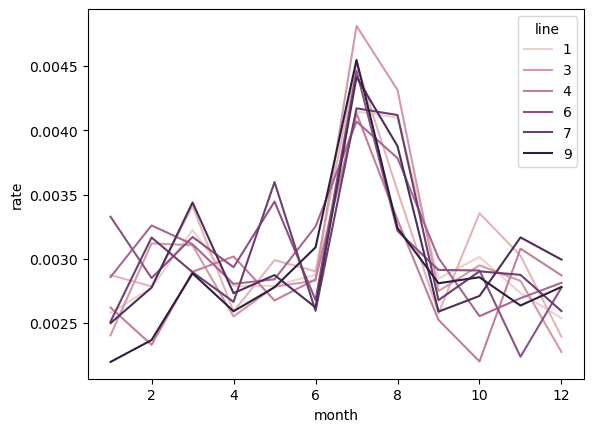

In [105]:
df_agg2 = df_prod2.groupby(['line','month'])[['production','defective']].sum()
df_agg2['rate'] = df_agg2['defective']/df_agg2['production']
df_agg2
sns.lineplot(data = df_agg2, x='month', y='rate', hue = 'line')

#### End of script